In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# 1 Metodo simplex

## Problema 1
Una fabrica produce dos productos. Cada producto requiere recursos limitados y genera diferentes ingresos. Maximizar los ingresos totales.

Maximizar: Z=3x + 5x

Rectricciones:
2x + x <= 10
x + 3x <= 15
x, x >= 0

/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_56537/1206763181.py:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 2, method='simplex')


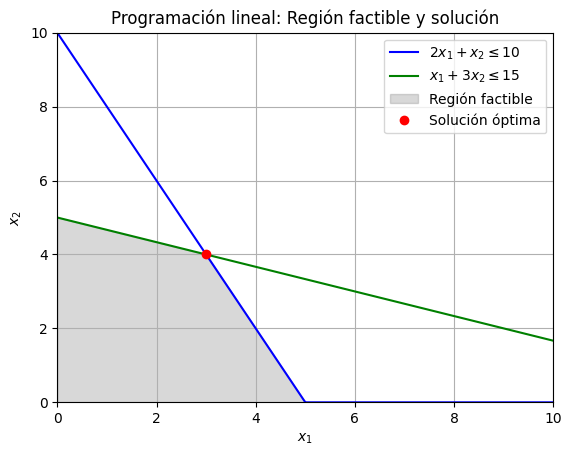

In [4]:
# Coeficientes de la función objetivo
c = [-3, -5]

# Matriz de restricciones
A = [[2, 1],
     [1, 3]]

# Límite derecho de las restricciones
b = [10, 15]

# Límites de las variables
x_bounds = (0, None)

# Resolver el problema
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 2, method='simplex')

# Crear las restricciones como funciones
x = np.linspace(0, 10, 400)

# Restricciones
y1 = (10 - 2 * x)  # 2x1 + x2 <= 10 -> x2 = 10 - 2x1
y2 = (15 - x) / 3  # x1 + 3x2 <= 15 -> x2 = (15 - x1) / 3

# Limitar las restricciones al rango positivo
y1 = np.maximum(0, y1)
y2 = np.maximum(0, y2)

# Graficar las restricciones
plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 10$', color='blue')
plt.plot(x, y2, label=r'$x_1 + 3x_2 \leq 15$', color='green')

# Rellenar la región factible
plt.fill_between(x, np.minimum(y1, y2), color='grey', alpha=0.3, label='Región factible')

# Graficar la solución óptima
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Solución óptima')

# Etiquetas y detalles
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Programación lineal: Región factible y solución')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Interpretacion

El punto rojo indica la cantidad de productos tanto 1 como 2 en el que se producen mayor cantidad de productos en total

### Problema 2
Encontrar la combinaci ́on m ́as econ ́omica de alimentos para cumplir requisitos nutricionales.

Minimizar: Z = 2x1 + 3x2
Sujeto a:
x1 + 2x2 ≥ 8
2x1 + x2 ≥ 6
x1, x2 ≥ 0

/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_56537/1649956248.py:15: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 2, method='simplex')


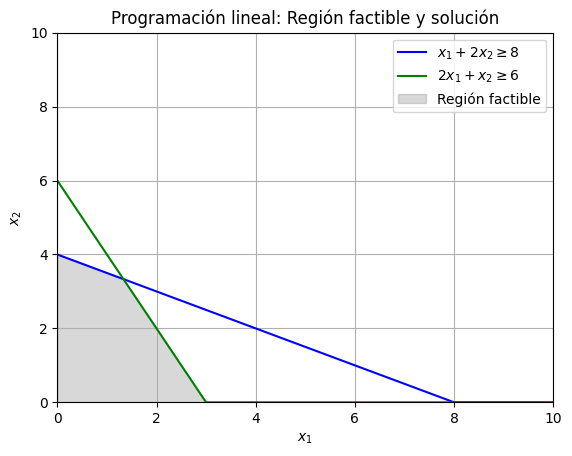

In [8]:
# Coeficientes de la función objetivo
c = [-2, -3]

# Matriz de restricciones (convertidas para >=)
A = [[-1, -2],
     [-2, -1]]

# Límite derecho de las restricciones
b = [-8, -6]

# Límites de las variables
x_bounds = (0, None)

# Resolver el problema
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 2, method='simplex')

# Crear las restricciones como funciones
x = np.linspace(0, 10, 400)

# Restricciones convertidas
y1 = (8 - x) / 2  # -x1 - 2x2 >= -8 -> x2 = (8 - x1) / 2
y2 = (6 - 2 * x)  # -2x1 - x2 >= -6 -> x2 = 6 - 2x1

# Limitar las restricciones al rango positivo
y1 = np.maximum(0, y1)
y2 = np.maximum(0, y2)

# Graficar las restricciones
plt.plot(x, y1, label=r'$x_1 + 2x_2 \geq 8$', color='blue')
plt.plot(x, y2, label=r'$2x_1 + x_2 \geq 6$', color='green')

# Rellenar la región factible
plt.fill_between(x, np.minimum(y1, y2), color='grey', alpha=0.3, label='Región factible')

# Graficar la solución óptima
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Solución óptima')

# Etiquetas y detalles
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Programación lineal: Región factible y solución')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

## ejemplo 3

In [ ]:
# Coeficientes de la función objetivo
c = [4, 6, 3, 5]

# Restricciones de igualdad
A_eq = [[1, 1, 0, 0], [0, 0, 1, 1]]
b_eq = [20, 30]

# Restricciones de desigualdad
A_ub = [[1, 0, 1, 0], [0, 1, 0, 1]]
b_ub = [25, 25]

# Límites de las variables
x_bounds = (0, None)  # Variables >= 0
bounds = [x_bounds] * 4

# Resolviendo el problema de programación lineal
result = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex')

# Imprimiendo el resultado
print("Resultado:", result)

# Visualización
x1 = np.linspace(0, 30, 500)
x2 = np.linspace(0, 30, 500)

# Restricciones gráficas
plt.plot(x1, 20 - x1, label='x1 + x2 = 20 (Restricción de igualdad)', color='blue')
plt.plot(x1, (25 - x1), label='x1 + x3 = 25 (Restricción de desigualdad)', color='orange')

# Relleno del área factible
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
plt.fill_between(x1, np.minimum(20 - x1, 25 - x1), color='gray', alpha=0.3, label='Región factible')

# Configuraciones del gráfico
plt.title("Restricciones y área factible")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Mostrando el gráfico
plt.show()

# 2 Planteamiento del Problema

Dos equipos de agentes colaboran para recolectar recursos en una regi ́on com-
partida, minimizando el tiempo total de operaci ́on. Cada agente tiene un l ́ımite
de tiempo y cada equipo una capacidad m ́axima de recursos.


/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/4148395323.py:23: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(


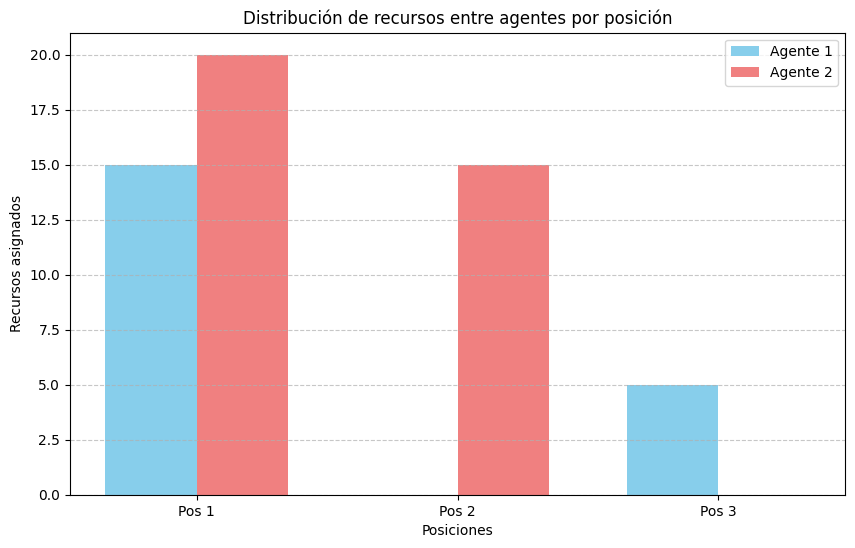

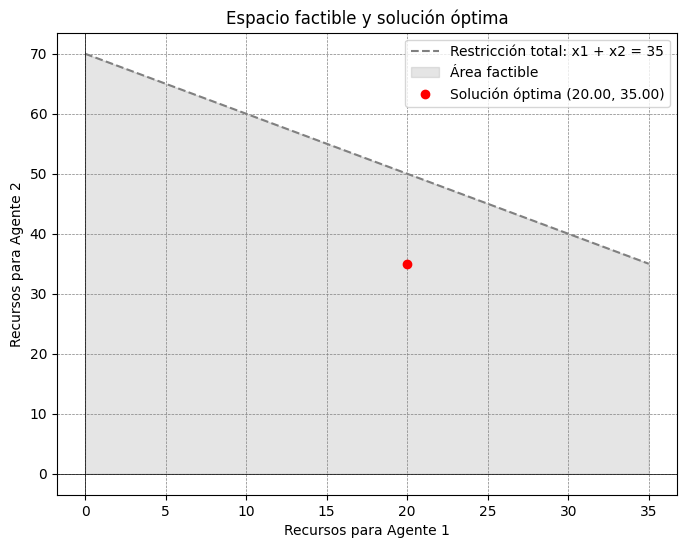

In [69]:
# Coeficientes de la función objetivo (tiempo por posición)
c = [2, 3, 4, 1, 2, 3]

# Restricciones de recursos
A = [
    [1, 1, 0, 0, 0, 0],  # Recursos posición 1
    [0, 0, 1, 1, 0, 0],  # Recursos posición 2
    [0, 0, 0, 0, 1, 1]   # Recursos posición 3
]
b = [15, 25, 30]  # Recursos disponibles por posición

# Restricciones de tiempo por agente
A_eq = [
    [1, 1, 1, 0, 0, 0],  # Agente 1
    [0, 0, 0, 1, 1, 1]   # Agente 2
]
b_eq = [20, 35]  # Tiempos máximos por agente

# Límites de las variables
x_bounds = (0, None)

# Resolver el problema
result = linprog(
    c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq,
    bounds=[x_bounds] * 6, method='simplex'
)

# Solución óptima
solution = result.x  # Valores óptimos de las variables

# Reestructurar solución para agentes y posiciones
positions = ["Pos 1", "Pos 2", "Pos 3"]
agents = ["Agente 1", "Agente 2"]
solution_matrix = np.array(solution).reshape(2, 3)  # 2 agentes x 3 posiciones

# Graficar distribución de recursos por posición
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x_pos = np.arange(len(positions))

# Asignación de recursos para cada agente
ax.bar(x_pos, solution_matrix[0], bar_width, label="Agente 1", color='skyblue')
ax.bar(x_pos + bar_width, solution_matrix[1], bar_width, label="Agente 2", color='lightcoral')

# Etiquetas y estilo
ax.set_xlabel("Posiciones")
ax.set_ylabel("Recursos asignados")
ax.set_title("Distribución de recursos entre agentes por posición")
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(positions)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Graficar espacio factible y solución óptima
x = np.linspace(0, 35, 500)  # Valores para el eje x
y = 70 - x  # Restricción: x1 + x2 <= 35 (simplificación para visualización)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Restricción total: x1 + x2 = 35", linestyle='--', color='gray')
plt.fill_between(x, 0, y, alpha=0.2, color='gray', label="Área factible")

# Punto solución
x1_sol = sum(solution_matrix[0])  # Recursos totales para Agente 1
x2_sol = sum(solution_matrix[1])  # Recursos totales para Agente 2
plt.plot(x1_sol, x2_sol, 'ro', label=f"Solución óptima ({x1_sol:.2f}, {x2_sol:.2f})")

plt.xlabel("Recursos para Agente 1")
plt.ylabel("Recursos para Agente 2")
plt.title("Espacio factible y solución óptima")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# 3 Ejercicios

### Ejercicio 1

Descripcion: Un AGENTE debe recolectar monedas en un area limitada mien-
tras minimiza el tiempo de desplazamiento. Se define la cantidad de monedas a
recolectar en cada posici ́on para maximizar el valor total sin exceder el tiempo
disponible.

Ejercicio 1
Resultado:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -42.0
       x: [ 0.000e+00  9.000e+00  1.000e+00]
     nit: 3


/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/3565321556.py:23: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 3, method='simplex')


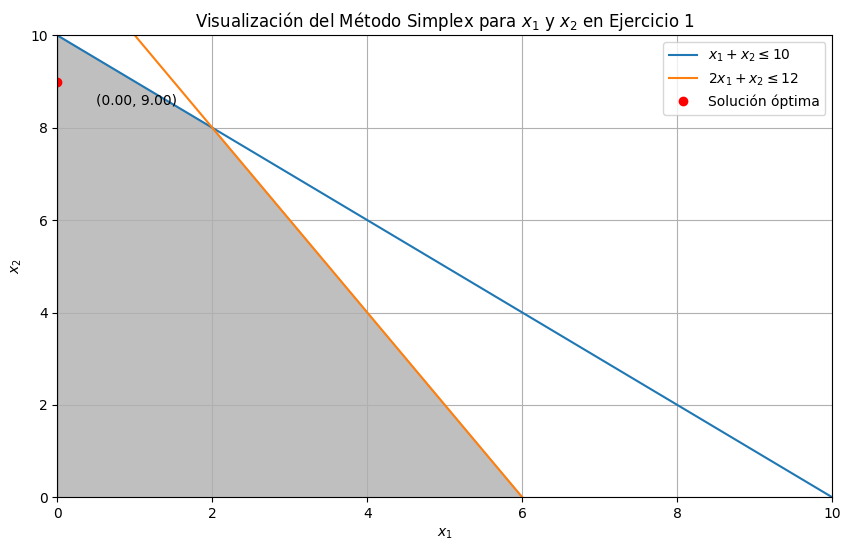

In [2]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 1
print("Ejercicio 1")
# Coeficientes de la función objetivo
c = [-5, -4, -6]  # Negativos porque queremos maximizar

# Matriz de restricciones
A = [
    [1, 1, 1],  # Tiempo total
    [2, 1, 3]   # Capacidad máxima
]

# Vector de límites de las restricciones
b = [10, 12]

# Límites de las variables
x_bounds = (0, None)

# Resolver el problema
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds] * 3, method='simplex')
print("Resultado:", result)

# Graficar las restricciones para las primeras dos variables
x = np.linspace(0, 10, 400)
y1 = 10 - x  # x1 + x2 <= 10
y2 = (12 - 2*x) / 1  # 2x1 + x2 <= 12

plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'$x_1 + x_2 \leq 10$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 12$')

# Sombrear la región factible
y = np.minimum(y1, y2)
plt.fill_between(x, 0, y, where=(y >= 0), color='gray', alpha=0.5)

# Graficar la solución óptima
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Solución óptima')
    plt.annotate(f'({result.x[0]:.2f}, {result.x[1]:.2f})', xy=(result.x[0], result.x[1]), xytext=(result.x[0]+0.5, result.x[1]-0.5))

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Visualización del Método Simplex para $x_1$ y $x_2$ en Ejercicio 1')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 2

Descripci ́on: Dos AGENTES deben recolectar monedas desde 4 posiciones.
El objetivo es minimizar el costo total de asignaci ́on.

In [ ]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ejercicio 3
print("Ejercicio 3")
# Matriz de costos
c = [8, 6, 7, 4, 3, 7, 5, 6]  # Costos por AGENTE y posición

# Restricciones
A = [
    [1, 1, 0, 0, 1, 1, 0, 0],  # AGENTE 1 solo realiza dos tareas
    [0, 0, 1, 1, 0, 0, 1, 1]   # AGENTE 2 también
]

b = [2, 2]  # Cada AGENTE tiene una capacidad de dos tareas

# Límites de las variables
x_bounds = (0, 1)

# Resolver el problema
result = linprog(c, A_eq=A, b_eq=b, bounds=[x_bounds] * 8, method='simplex')
print("Asignación óptima:", result)

# Crear la matriz de asignación
assignment = np.array(result.x).reshape(2, 4)

# Crear un heatmap para visualizar la asignación
tasks = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']
agents = ['Agente 1', 'Agente 2']

plt.figure(figsize=(10, 6))
sns.heatmap(assignment, annot=True, cmap="YlGnBu", xticklabels=tasks[:4], yticklabels=agents, cbar=False)
plt.xlabel('Tareas')
plt.ylabel('Agentes')
plt.title('Asignación de Tareas a Agentes')
plt.show()

### Ejercicio 3

Descripci ́on: Un AGENTE debe recolectar monedas visitando m ́ultiples pun-
tos. El objetivo es encontrar la ruta que maximice el valor recolectado mientras
cumple restricciones de tiempo y capacidad.

Cost matrix:
[0.         3.16227766 5.         6.08276253 3.         3.16227766
 0.         3.         5.38516481 3.60555128 5.         3.
 0.         2.82842712 3.16227766 6.08276253 5.38516481 2.82842712
 0.         3.16227766 3.         3.60555128 3.16227766 3.16227766
 0.        ]
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0.]
Optimal solution found
Route from 0 to 1
Route from 1 to 2
Route from 2 to 3
Route from 3 to 4
Route from 4 to 0


/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/2058919974.py:59: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')
/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/2058919974.py:59: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')


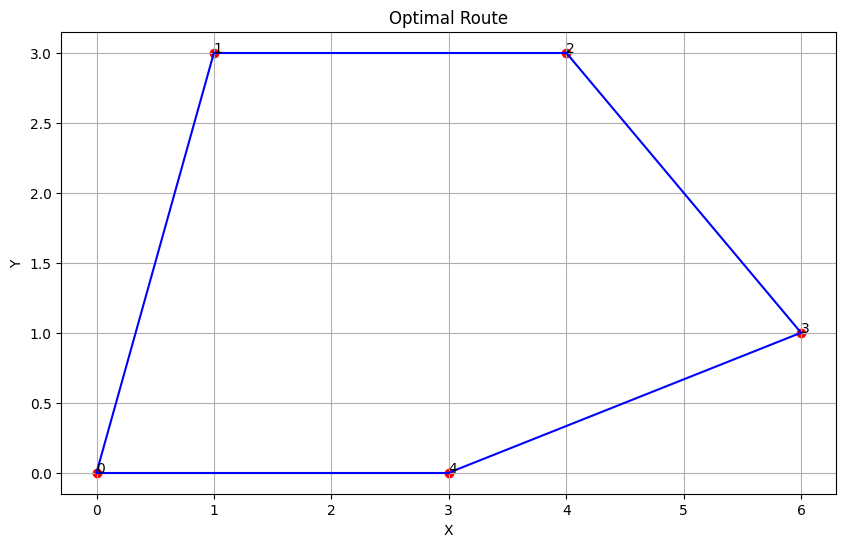

In [75]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

# Define the points and the cost matrix (distances)
points = np.array([
    [0, 0],  # Point 0
    [1, 3],  # Point 1
    [4, 3],  # Point 2
    [6, 1],  # Point 3
    [3, 0]   # Point 4
])

num_points = len(points)
cost_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        if i != j:
            cost_matrix[i, j] = np.linalg.norm(points[i] - points[j])

# Flatten the cost matrix for the objective function
c = cost_matrix.flatten()
print("Cost matrix:")
print(c)

# Constraints for visiting each point exactly once (rows)
A_eq = []
b_eq = []

for i in range(num_points): # Constraints for visiting each point exactly once (rows)
    constraint = np.zeros(num_points * num_points)
    constraint[i * num_points:(i + 1) * num_points] = 1
    A_eq.append(constraint)
    b_eq.append(1)

# Constraints for leaving each point exactly once (columns)
for j in range(num_points):
    constraint = np.zeros(num_points * num_points)
    constraint[j::num_points] = 1
    A_eq.append(constraint)
    b_eq.append(1)

A_eq = np.array(A_eq)
b_eq = np.array(b_eq)

# Define the bounds and integer constraints
bounds = []
for i in range(num_points):
    for j in range(num_points):
        if i == j:
            bounds.append((0, 0))  # Disallow self-loops
        else:
            bounds.append((0, 1))

integrality = np.ones(num_points * num_points)

# Solve using the linprog method
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')
print(result.x)


# Check if the problem was solved
if result.success:
    print("Optimal solution found")
    solution = result.x.reshape((num_points, num_points))

    # Plot the points and the optimal route
    plt.figure(figsize=(10, 6))
    plt.scatter(points[:, 0], points[:, 1], color='red')

    # Annotate the points
    for i in range(num_points):
        plt.annotate(f'{i}', (points[i, 0], points[i, 1]))

    # Draw the lines for the optimal route
    for i in range(num_points):
        for j in range(num_points):
            if solution[i, j] > 0.5:  # If the route is selected
                print(f"Route from {i} to {j}")
                plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], color='blue')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Route')
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")


### Ejercicio 4

Descripci ́on: Dos AGENTES deben recolectar monedas en un  ́area compar-
tida sin colisionar, maximizando el valor total.

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 15.477537765419708
       x: [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
     nit: 101
Optimal solution found
Agent 1 route from 0 to 1
Agent 1 route from 1 to 0
Agent 2 route from 2 to 3
Agent 2 route from 3 to 4
Agent 2 route from 4 to 2


/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/314217298.py:81: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')
/var/folders/87/x7m8jk5n55qcs44ntyqbt1tr0000gn/T/ipykernel_64904/314217298.py:81: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')


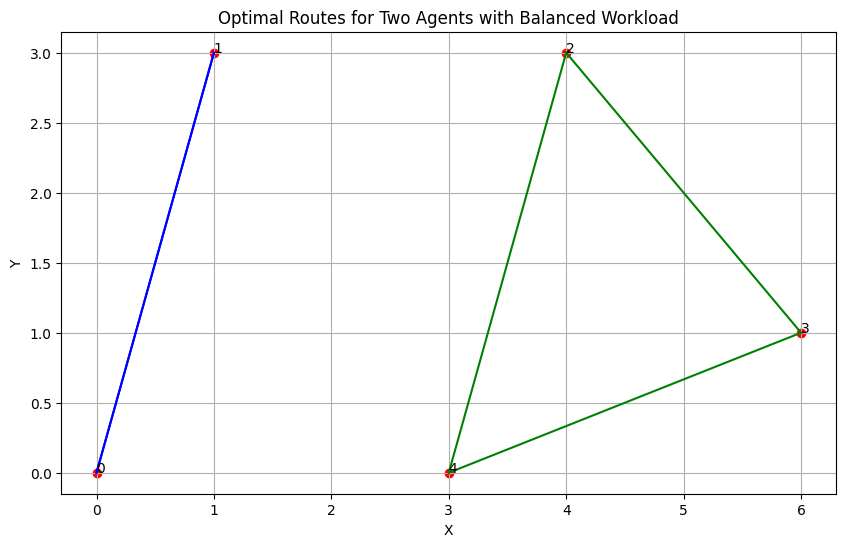

In [76]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

# Define the points and the cost matrix (distances)
points = np.array([
    [0, 0],  # Point 0
    [1, 3],  # Point 1
    [4, 3],  # Point 2
    [6, 1],  # Point 3
    [3, 0],   # Point 4
])

num_points = len(points)
cost_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        if i != j:
            cost_matrix[i, j] = np.linalg.norm(points[i] - points[j])

# Flatten the cost matrix for both agents
c = np.concatenate((cost_matrix.flatten(), cost_matrix.flatten()))

# Constraints for visiting each point exactly once (rows)
A_eq = []
b_eq = []

for i in range(num_points):
    constraint = np.zeros(2 * num_points * num_points)
    constraint[i * num_points:(i + 1) * num_points] = 1  # Agent 1
    constraint[num_points * num_points + i * num_points:num_points * num_points + (i + 1) * num_points] = 1  # Agent 2
    A_eq.append(constraint)
    b_eq.append(1)

# Constraints for leaving each point exactly once (columns)
for j in range(num_points):
    constraint = np.zeros(2 * num_points * num_points)
    constraint[j::num_points] = 1  # Agent 1
    constraint[num_points * num_points + j::num_points] = 1  # Agent 2
    A_eq.append(constraint)
    b_eq.append(1)

# Ensure flow consistency for both agents
for agent in range(2):
    for k in range(num_points):
        in_constraint = np.zeros(2 * num_points * num_points)
        out_constraint = np.zeros(2 * num_points * num_points)
        for i in range(num_points):
            in_constraint[agent * num_points * num_points + i * num_points + k] = 1
            out_constraint[agent * num_points * num_points + k * num_points + i] = 1
        A_eq.append(in_constraint - out_constraint)
        b_eq.append(0)

# Ensure each agent starts and ends at their respective starting points
start_points = [0, 4]  # Agent 1 starts at 0, Agent 2 starts at 4
for agent, start_point in enumerate(start_points):
    constraint = np.zeros(2 * num_points * num_points)
    for j in range(num_points):
        constraint[agent * num_points * num_points + start_point * num_points + j] = 1
    A_eq.append(constraint)
    b_eq.append(1)

    constraint = np.zeros(2 * num_points * num_points)
    for i in range(num_points):
        constraint[agent * num_points * num_points + i * num_points + start_point] = 1
    A_eq.append(constraint)
    b_eq.append(1)

# Define the bounds for both agents
bounds = []
for agent in range(2):
    for i in range(num_points):
        for j in range(num_points):
            if i == j:
                bounds.append((0, 0))  # Disallow self-loops
            else:
                bounds.append((0, 1))

# Solve using the linprog method
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')
print(result)

# Check if the problem was solved
if result.success:
    print("Optimal solution found")
    solution = result.x.reshape((2, num_points, num_points))

    # Plot the points and the optimal routes
    plt.figure(figsize=(10, 6))
    plt.scatter(points[:, 0], points[:, 1], color='red')

    # Annotate the points
    for i in range(num_points):
        plt.annotate(f'{i}', (points[i, 0], points[i, 1]))

    # Draw the lines for the optimal routes
    colors = ['blue', 'green']
    for agent in range(2):
        for i in range(num_points):
            for j in range(num_points):
                if solution[agent, i, j] > 0.5:  # If the route is selected
                    print(f"Agent {agent + 1} route from {i} to {j}")
                    plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], color=colors[agent])

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Routes for Two Agents with Balanced Workload')
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")
